In [6]:
import seaborn as sns
import pylab 
pylab.rcParams['figure.figsize'] = 15, 8

In [2]:
import pandas as pd

data = np.loadtxt('./data/results_weights.dat',
                  delimiter=',')
df = pd.DataFrame(data)
df.head()

0          1    2         3         4         5         6         7   \
0 -2.0  15.000000  0.3  0.405749  0.257309  0.217236  0.191424  0.165447   
1 -2.0  17.777778  0.3  0.400679  0.251558  0.214318  0.190845  0.165694   
2 -2.0  20.555556  0.3  0.396765  0.250468  0.215541  0.191649  0.165544   
3 -2.0  23.333333  0.3  0.395256  0.250310  0.215961  0.195160  0.170497   
4 -2.0  26.111111  0.3  0.391012  0.251453  0.218826  0.196900  0.173658   

         8         9         10        11        12  
0  0.156361  0.142337  0.129688  0.121442  0.115854  
1  0.157321  0.144020  0.131467  0.123886  0.118578  
2  0.160295  0.146633  0.135178  0.128198  0.123414  
3  0.165009  0.152265  0.140877  0.134617  0.129517  
4  0.168207  0.157012  0.145570  0.140434  0.135996

In [3]:
def plot_error_vs_params(df, first_param_label, 
                         second_param_label, readout_index=10):
    
    second_param_values = np.sort(df[1].value_counts().index.values)

    for second_param in second_param_values:

        first_param = df[df[1] == second_param][0].values
        error = df[df[1] == second_param][readout_index].values
        p.plot(first_param, error)
        p.scatter(first_param, error)
        
    p.legend(second_param_values, 
             bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    p.xlabel(first_param_label)
    p.ylabel('Detection error')
    p.show()
    
    first_param_values = np.sort(df[0].value_counts().index.values)[::2]
    
    for first_param in first_param_values:

        second_param = df[df[0] == first_param][1].values
        error = df[df[0] == first_param][readout_index].values
        p.plot(second_param, error)
        p.scatter(second_param, error)
        
    p.legend(first_param_values, 
             bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    p.xlabel(second_param_label)
    p.ylabel('Detection error')
    p.show()
    
    i_index = dict([(value, index) for index, value in \
          enumerate(np.sort(df[0].value_counts().index.values))])
    j_index = dict([(value, index) for index, value in \
          enumerate(np.sort(df[1].value_counts().index.values))])
    
    data = np.zeros((len(i_index), len(j_index)))

    for index, item in enumerate(df[readout_index]):
        ii_index = i_index[df[0].iloc[index]]
        jj_index = j_index[df[1].iloc[index]]
        data[ii_index][jj_index] = item
        
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i][j] == 0:
                if data[i-1][j] != 0:
                    data[i][j] = data[i-1][j]
                elif data[i+1][j] != 0:
                    data[i][j] = data[i+1][j]
                    
    sns.heatmap(data.transpose(),
            xticklabels=list(i_index.keys()),
            yticklabels=list(j_index.keys()),
            cmap='pink')
    p.xlabel(first_param_label)
    p.ylabel(second_param_label)

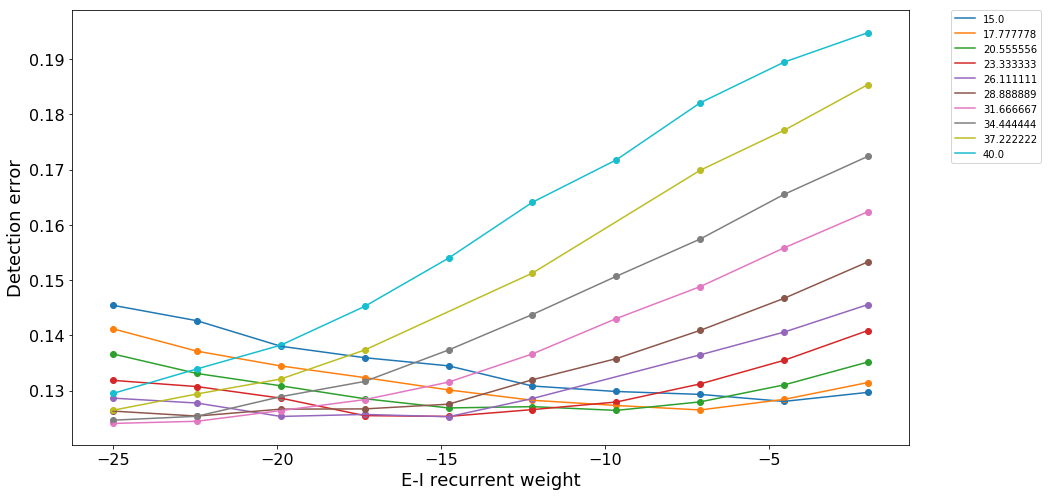

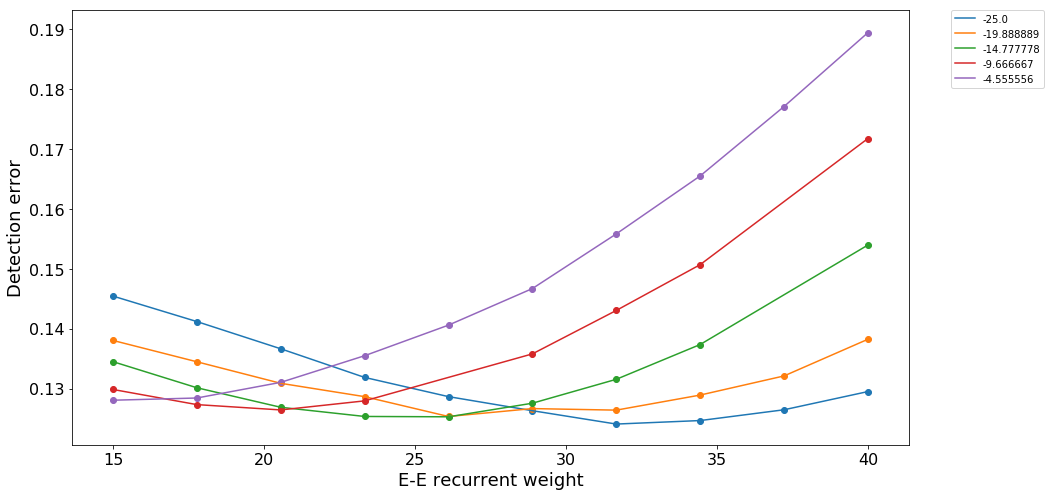

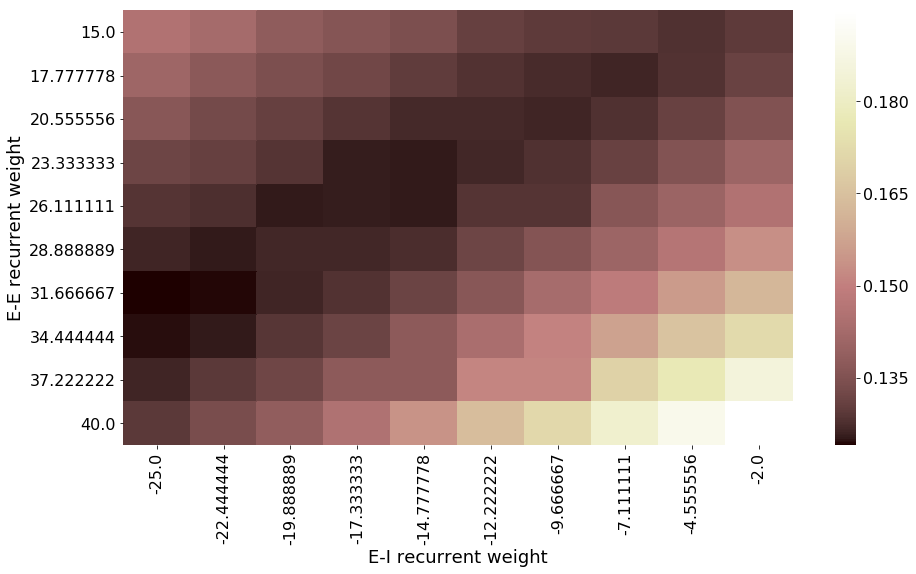

In [7]:
plot_error_vs_params(df, 
                     'E-I recurrent weight', 'E-E recurrent weight')

In [17]:
wie_values = df[0].value_counts().index.values
wee_values = df[1].value_counts().index.values

In [29]:
readout_index = 10

i_index = dict([(value, index) for index, value in \
          enumerate(np.sort(df[0].value_counts().index.values))])
j_index = dict([(value, index) for index, value in \
          enumerate(np.sort(df[1].value_counts().index.values))])
    
data = np.zeros((len(i_index), len(j_index)))

for index, item in enumerate(df[readout_index]):
    ii_index = i_index[df[0].iloc[index]]
    jj_index = j_index[df[1].iloc[index]]
    data[ii_index][jj_index] = item
        
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i][j] == 0:
            if data[i-1][j] != 0:
                data[i][j] = data[i-1][j]
            elif data[i+1][j] != 0:
                data[i][j] = data[i+1][j]

In [47]:
wie_init = -0.
wee_init = 10.

error_values = []

for alpha in np.linspace(1.0, 5.0, 20):
    
    wie_current = alpha * wie_init
    wee_current = alpha * wee_init
    
    wie_closest = wie_values[np.argmin(abs(wie_values - wie_current))]
    wee_closest = wee_values[np.argmin(abs(wee_values - wee_current))]
    
    error_values.append(data.T[i_index[wie_closest],
                               j_index[wee_closest]])

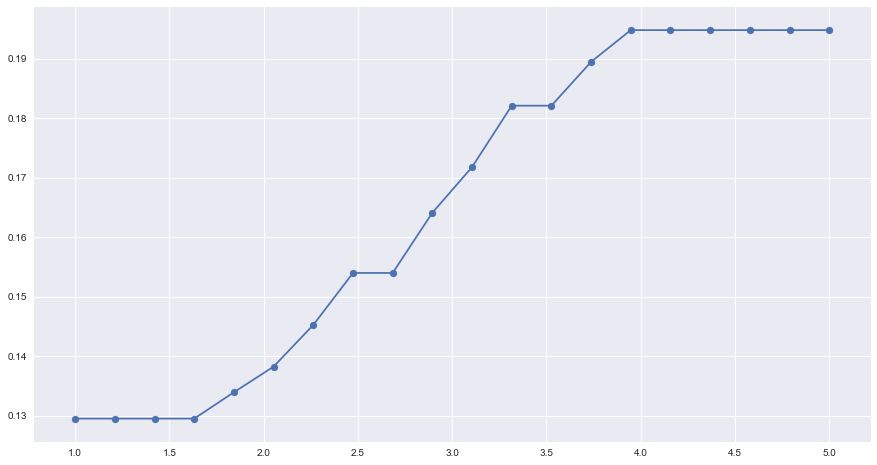

In [48]:
sns.set()

p.plot(np.linspace(1.0, 5.0, 20), error_values)
p.scatter(np.linspace(1.0, 5.0, 20), error_values)